# Multi-Classes Classification by Neural Network   
For multi-classes, softmax is used instead of signoid function (for binary classification). 

In [10]:
import numpy as np 
import pandas as pd 

def get_data():
    df = pd.read_csv('./ecommerce_data.csv')
    data = df.as_matrix()
    
    # shuffle 
    np.random.shuffle(data) 
    
    # split features and label 
    X = data[:,:-1]
    Y = data[:,-1].astype(np.int32) 
    
    # one-hot encoding the categorical data 
    N, D = X.shape 
    X2 = np.zeros((N, D+3))  # 4 categories (3 additional columns) 
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    for n in range(N): 
        t = int(X[n,D-1])
        X2[n,D+t-1] = 1 
        
    X = X2 
    
    # split train and test 
    Xtrain = X[:-100]
    Ytrain = Y[:-100]
    Xtest = X[-100:]
    Ytest = Y[-100:]
    
    # normalize column 1 and 2 (numerical) 
    for i in (1,2): 
        m = Xtrain[:,i].mean() 
        s = Xtrain[:,i].std() 
        Xtrain[:,i] = (Xtrain[:,i] - m) / s
        Xtest[:,i] = (Xtest[:,i] - m) / s
        
    return Xtrain, Ytrain, Xtest, Ytest 

In [11]:
def softmax(a): 
    expA = np.exp(a) 
    return expA / expA.sum(axis=1, keepdims=True) 

In [12]:
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_sig(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1) 
    return softmax(Z.dot(W2) + b2), Z

In [13]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [14]:
def classification_rate(Y, P):
    return np.mean(Y == P)

In [15]:
def cross_entropy(T, pY): 
    return -np.mean(T*np.log(pY))

## Data Preparation 

In [16]:
def vectorize_class(y,K):
    N = len(y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,y[i]] = 1
    return ind

In [17]:
Xtrain, Ytrain, Xtest, Ytest = get_data()
N, D = Xtrain.shape
K = np.max( [np.max(Ytrain), np.max(Ytest)] ) + 1  # the number of classes 

Ytrain_vect = vectorize_class(Ytrain, K) 
Ytest_vect  = vectorize_class(Ytest,  K)

## Training  (hidden layer with 5 unites, tanh activation)  
Activation function in hidden layer is tanh() 

In [26]:
# randomly initialize weights
M = 5 # the number of units in hidden layer 
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

train_costs = [] 
test_costs = [] 
train_scores = []
test_scores = [] 
learning_rate = 0.001

for i in range(10000):
    pYtrain_vect, Ztrain = forward(Xtrain, W1, b1, W2, b2) 
    pYtest_vect, Ztest = forward(Xtest, W1, b1, W2, b2) 
    
    ctrain = cross_entropy(Ytrain_vect, pYtrain_vect)
    ctest  = cross_entropy(Ytest_vect,  pYtest_vect) 
    train_costs.append(ctrain) 
    test_costs.append(ctest) 
    
    # vector to probability (argmax)
    pYtrain = predict(pYtrain_vect) 
    pYtest = predict(pYtest_vect) 
    
    strain = classification_rate(Ytrain, pYtrain)
    stest  = classification_rate(Ytest,  pYtest)
    train_scores.append(strain) 
    test_scores.append(stest) 
    
    # gradient decent 
    W2 -= learning_rate*Ztrain.T.dot(pYtrain_vect - Ytrain_vect)
    b2 -= learning_rate*(pYtrain_vect - Ytrain_vect).sum(axis=0) 
    
    # note: Activation function of hidden layer is tanh() 
    # delivertive of tanh is (1-z*z)
    
    dz = (pYtrain_vect - Ytrain_vect).dot(W2.T) * (1-Ztrain*Ztrain) 
    W1 -= learning_rate*Xtrain.T.dot(dz) 
    b1 -= learning_rate*dz.sum(axis=0) 
    
    if i % 1000 == 0:
        print(i, ctrain, ctest) 
        

print("Final train classification_rate: ", classification_rate(Ytrain, pYtrain))
print("Final test classification_rate: ", classification_rate(Ytest, pYtest))


0 0.5659465884131927 0.5734553832787797
1000 0.02795932893444686 0.054879260624818384
2000 0.018056837400853388 0.061877563226527335
3000 0.014674986382754693 0.07689232905435898
4000 0.012261793229862898 0.08279205193279453
5000 0.01099574996202194 0.08729128437340453
6000 0.010112514528999354 0.09160460682462915
7000 0.009456159255382733 0.09574829134671184
8000 0.008942554182453866 0.0996819558765122
9000 0.00852315377341851 0.10346233650408614
Final train classification_rate:  0.99
Final test classification_rate:  0.9


## Cost (i.e., cross entropy) 

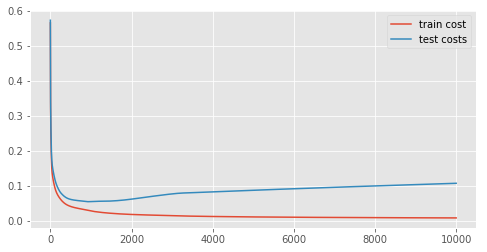

In [27]:
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use("ggplot")

plt.figure(figsize=(8,4))
plt.plot(train_costs, label='train cost') 
plt.plot(test_costs, label='test costs')
plt.legend();

## Score (classification success rate) 

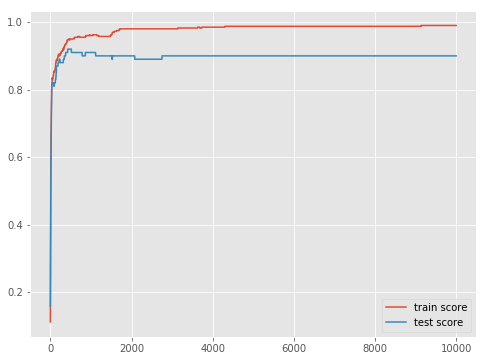

In [28]:
plt.figure(figsize=(8,6))
plt.plot(train_scores, label='train score')
plt.plot(test_scores, label='test score')
plt.legend();

## Training (hidden layer with 5 units, sigmoid activation) 
Activation function in hidden layer is sigmoid 

In [30]:
# randomly initialize weights
M = 5 # the number of units in hidden layer 
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

train_costs = [] 
test_costs = [] 
train_scores = []
test_scores = [] 
learning_rate = 0.001

for i in range(10000):
    pYtrain_vect, Ztrain = forward_sig(Xtrain, W1, b1, W2, b2) 
    pYtest_vect, Ztest = forward_sig(Xtest, W1, b1, W2, b2) 
    
    ctrain = cross_entropy(Ytrain_vect, pYtrain_vect)
    ctest  = cross_entropy(Ytest_vect,  pYtest_vect) 
    train_costs.append(ctrain) 
    test_costs.append(ctest) 
    
    # vector to probability (argmax)
    pYtrain = predict(pYtrain_vect) 
    pYtest = predict(pYtest_vect) 
    
    strain = classification_rate(Ytrain, pYtrain)
    stest  = classification_rate(Ytest,  pYtest)
    train_scores.append(strain) 
    test_scores.append(stest) 
    
    # gradient decent 
    W2 -= learning_rate*Ztrain.T.dot(pYtrain_vect - Ytrain_vect)
    b2 -= learning_rate*(pYtrain_vect - Ytrain_vect).sum(axis=0) 
    
    # note: Activation function of hidden layer is tanh() 
    # delivertive of sigmoid s(x) is s(1-s)
    
    dz = (pYtrain_vect - Ytrain_vect).dot(W2.T) * Ztrain*(1-Ztrain) 
    W1 -= learning_rate*Xtrain.T.dot(dz) 
    b1 -= learning_rate*dz.sum(axis=0) 
    
    if i % 1000 == 0:
        print(i, ctrain, ctest) 
        

print("Final train classification_rate: ", classification_rate(Ytrain, pYtrain))
print("Final test classification_rate: ", classification_rate(Ytest, pYtest))


0 0.4259188149006745 0.4458580470701605
1000 0.0637880868532521 0.08425803430649753
2000 0.04831556487357329 0.0716757666507423
3000 0.030243439572663098 0.04848639666176244
4000 0.021336587342756674 0.03776973148659236
5000 0.017753292079234345 0.03494505909494885
6000 0.01566306924390453 0.03404628033909871
7000 0.01404166162792726 0.033921761111800966
8000 0.012605534413814134 0.033884302037459964
9000 0.011440703026689997 0.03324533165593436
Final train classification_rate:  0.9875
Final test classification_rate:  0.94


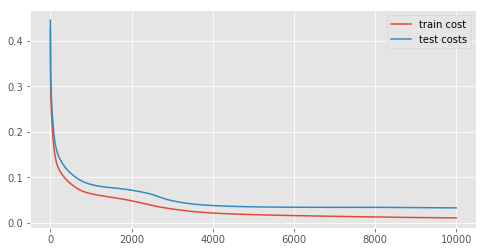

In [31]:
plt.figure(figsize=(8,4))
plt.plot(train_costs, label='train cost') 
plt.plot(test_costs, label='test costs')
plt.legend();

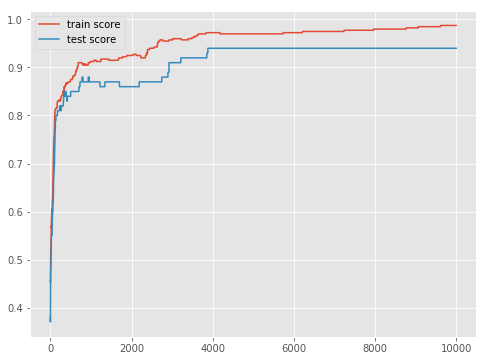

In [32]:
plt.figure(figsize=(8,6))
plt.plot(train_scores, label='train score')
plt.plot(test_scores, label='test score')
plt.legend();